<a href="https://colab.research.google.com/github/parvathymr21/ml-algo/blob/main/model_based_clustering(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

# 1. Apply model based clustering on Data 1
(a) Report the number of clusters and the technique used to find the
number of clusters.
(b) Plot the clusters.
(c) Report the mean, co-variance matrix and prior probability corresponding to each cluster.
(d) Assess the quality of the clusters.


In [ ]:
data1 = pd.read_csv('data1.csv')
data1.head()
data1.drop(data1.columns[[0]], axis = 1, inplace = True)
data1.shape


(1600, 2)

In [ ]:
data1.isna().sum()
scaler = StandardScaler()
X = scaler.fit_transform(data1)
X = np.array(X)
X

array([[-1.15403565,  1.39995404],
       [-0.21991635, -1.02249967],
       [ 1.35937724, -0.87685543],
       ...,
       [-1.22772782,  1.35528844],
       [ 1.55971659, -1.12893882],
       [ 0.01098062,  0.0543328 ]])

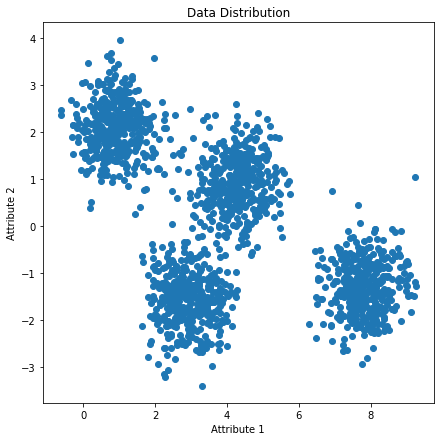

array([[-1.15403565,  1.39995404],
       [-0.21991635, -1.02249967],
       [ 1.35937724, -0.87685543],
       ...,
       [-1.22772782,  1.35528844],
       [ 1.55971659, -1.12893882],
       [ 0.01098062,  0.0543328 ]])

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data1.iloc[:,0],data1.iloc[:,1])
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.title('Data Distribution')
plt.show()
x=np.cov(data1.T) 
X

In [ ]:
# implies 4 clusters are there

from scipy.stats import multivariate_normal

class model_clustering:
    def __init__(self, n_clusters, max_iter):
        self.k = n_clusters
        self.max_iter = max_iter

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mean = [  X[row_index,:] for row_index in random_row ]
        self.cov = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi keeping mean and covariance constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
        return self.phi
    
    def m_step(self, X):
        # M-Step: update mean and covariance keeping phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mean[i] = (X * weight).sum(axis=0) / total_weight
            self.cov[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)
        return self.mean,self.cov

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            phi = self.e_step(X)
            m,c = self.m_step(X)
        return phi,m,c
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mean[i], 
                cov=self.cov[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

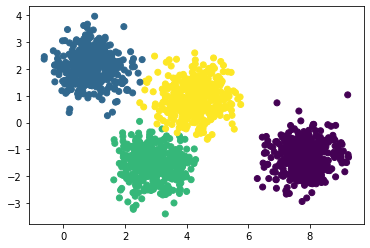

Prior probability corresponding to each cluster :
 cluster 0: 0.24993968863404742 
cluster 1: 0.25064335518559006 
cluster 2: 0.24751030329488471 
cluster 3: 0.25190665288547726
Mean corresponding to each cluster :
 cluster 0: [ 1.48542871 -0.81490985] 
cluster 1: [-1.18572887  1.25187999] 
cluster 2: [-0.41112795 -0.98715542] 
cluster 3: [0.10990531 0.53287219]
Covariance corresponding to each cluster :
 cluster 0: [[0.04993541 0.00590034]
 [0.00590034 0.12675402]] 
cluster 1: [[ 0.050648   -0.00327039]
 [-0.00327039  0.12713224]] 
cluster 2: [[ 0.04959038 -0.00274184]
 [-0.00274184  0.12584083]] 
cluster 3: [[0.05473293 0.00325903]
 [0.00325903 0.1341623 ]]


In [ ]:



#np.random.seed(42)
m_cluster = model_clustering(n_clusters=4, max_iter=100)
prior,mean,cov = m_cluster.fit(X)
label = m_cluster.predict(X)
data1['label'] = label
#mean =  pd.DataFrame({'cluster 0':mean[0],'cluster 1':mean[1],'cluster 2':mean[2],'cluster 3':mean[3]})

n_labels = np.unique(label)

#for i in n_labels:
plt.scatter(data1.iloc[:,0],data1.iloc[:,1],c=label)
    

plt.show()
print('Prior probability corresponding to each cluster :\n cluster 0:',prior[0],
      '\ncluster 1:',prior[1],'\ncluster 2:',prior[2],'\ncluster 3:',prior[3])
print('Mean corresponding to each cluster :\n cluster 0:',mean[0],
      '\ncluster 1:',mean[1],'\ncluster 2:',mean[2],'\ncluster 3:',mean[3])
print('Covariance corresponding to each cluster :\n cluster 0:',cov[0],
      '\ncluster 1:',cov[1],'\ncluster 2:',cov[2],'\ncluster 3:',cov[3])
